In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\otaku7\Desktop\imdb_top_2000_movies.csv")


In [2]:
data

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,$11.00M
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,$60.02M
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,$33.31M
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,$15.28M


In [3]:
data.describe()

,Duration,IMDB Rating,Metascore
count,2000.000000,2000.000000,1919.000000
mean,113.939000,6.922600,61.044294
std,22.946035,0.955618,17.937722
min,50.000000,1.500000,9.000000
25%,98.000000,6.400000,48.000000
50%,110.000000,7.000000,61.000000
75%,125.000000,7.600000,74.000000
max,271.000000,9.300000,100.000000


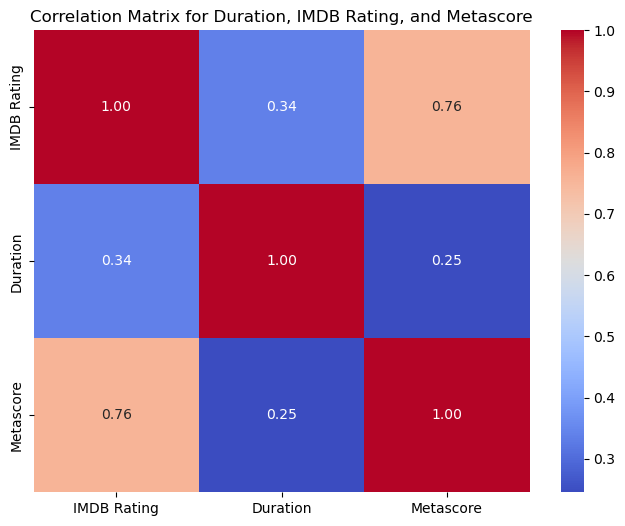

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'data'

# Selecting the columns of interest
selected_columns = ['IMDB Rating','Duration',  'Metascore']
selected_data = data[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Duration, IMDB Rating, and Metascore')
plt.show()


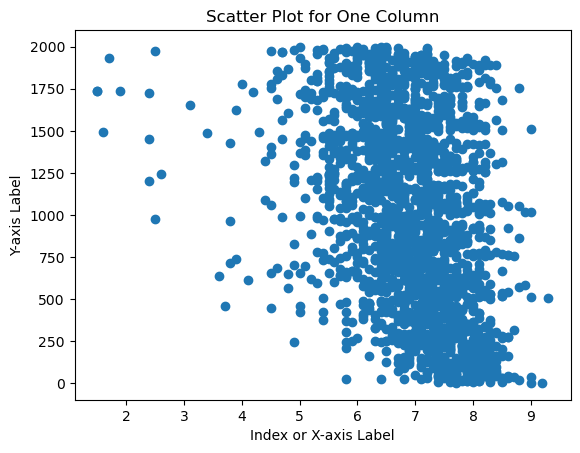

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.scatter( data['IMDB Rating'],data.index)
plt.xlabel('Index or X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot for One Column')
plt.show()

In [6]:
data.shape

(2000, 10)

<Axes: >

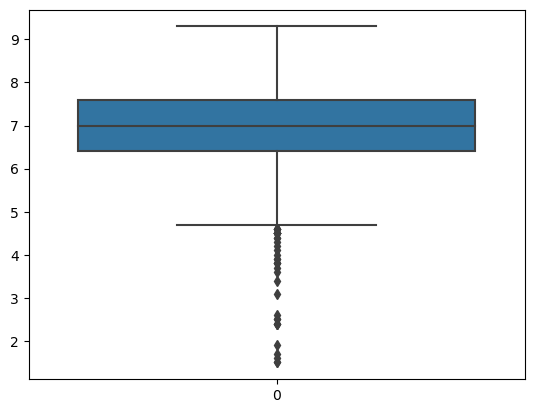

In [7]:

# Box Plot
import seaborn as sns
sns.boxplot(data['IMDB Rating'])

In [11]:
# Drop any rows with missing values
# data.dropna(inplace=True)

# Detect and handle outlier data
outliers = data[(np.abs(data['IMDB Rating'] - data['IMDB Rating'].mean()) > (3 * data['IMDB Rating'].std()))]

data = data[(np.abs(data['IMDB Rating'] - data['IMDB Rating'].mean()) <= (3 * data['IMDB Rating'].std()))]
 

In [12]:
outliers.shape

(21, 10)

In [13]:
data.shape


(1979, 10)

In [14]:
Values = data.values
Values = Values[:, 3]
print(Values)



[9.2 9.0 7.7 ... 6.5 6.4 6.0]


In [20]:
def k_means_clustering(Values, K):
    # Step 1: Initialize random cluster centers (centroids) based on the K
    centroids = data.sample(n=K).values
#     print(centroids)
    centroids = centroids[:, 3]
#     print(centroids)
    # Step 2: Iterate over the data rows, calculate the distance between each row and each one of the random centroids
    # and assign the row to the closest centroid, until convergence which means that the centroids don't change
    isDifference = 1
    clusters = {}
    while isDifference:
        for row_index, row_itself in enumerate(Values):
            
            # Iterating over the rows
            list_of_distances = []
            for cluster_index, centroid in enumerate(centroids):
                
                
                # Iterating over the centroids                    
                    # Euclidean distance
                centroid = np.array(centroid)
                row_itself = np.array(row_itself)
                distance = np.sqrt(np.sum((centroid - row_itself)**2))
                list_of_distances.append(distance)
          

            # Assigning the row_index to the closest centroid
            clusters[row_index] = list_of_distances.index(min(list_of_distances))
            # print(clusters)
        
        # Step 3: Calculate the new centroids based on the new cluster assignments
        new_centroids = pd.DataFrame(Values).groupby(by=clusters).mean().values
        print(f'New Centroids {new_centroids}')
        # Step 4: Check if the centroids have changed, if not then we are done
        print(f'Old Centroids {centroids}')
        if np.count_nonzero((centroids)-(new_centroids)) == 0:
            isDifference = 0
        else:
            centroids = new_centroids
        
    return clusters, centroids

In [21]:
k=4
clusters, centroids = k_means_clustering(Values, k)
print('#'*50)
print(f'Final Clusters: {clusters}')
print(f'Final Centroids: {centroids}')

New Centroids [[5.517605633802814]
 [8.04197802197801]
 [6.532283464566926]
 [7.29107438016528]]
Old Centroids [5.3 8.0 6.7 7.2]
New Centroids [[5.517605633802814]
 [8.04197802197801]
 [6.532283464566926]
 [7.29107438016528]]
Old Centroids [[5.517605633802814]
 [8.04197802197801]
 [6.532283464566926]
 [7.29107438016528]]
##################################################
Final Clusters: {0: 1, 1: 1, 2: 1, 3: 1, 4: 3, 5: 3, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 0, 22: 3, 23: 1, 24: 2, 25: 2, 26: 1, 27: 1, 28: 3, 29: 3, 30: 1, 31: 1, 32: 1, 33: 1, 34: 3, 35: 1, 36: 1, 37: 1, 38: 1, 39: 3, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 3, 49: 3, 50: 1, 51: 1, 52: 1, 53: 1, 54: 3, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 3, 62: 1, 63: 1, 64: 1, 65: 1, 66: 3, 67: 1, 68: 1, 69: 1, 70: 3, 71: 1, 72: 2, 73: 1, 74: 1, 75: 3, 76: 3, 77: 1, 78: 3, 79: 3, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 3, 87: 3, 88:

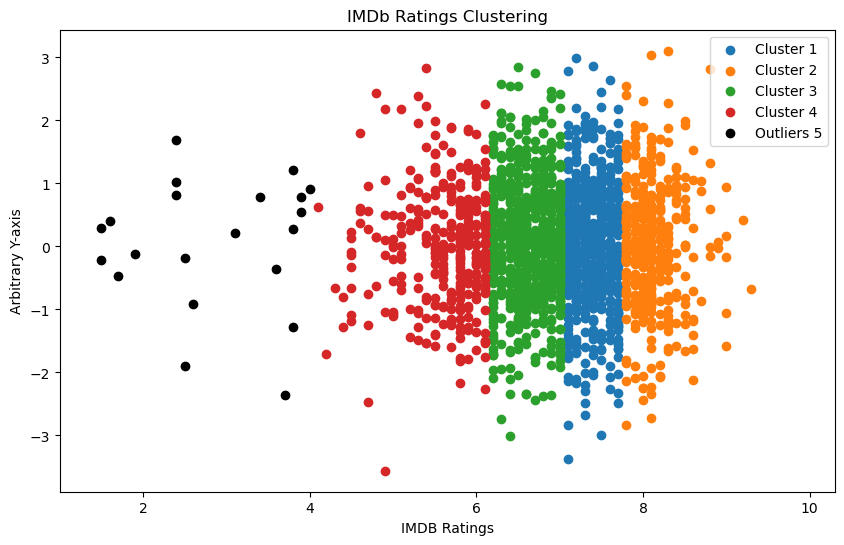

In [18]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):  # We assume K=4 for this example
    cluster_indices = np.where(np.array(list(clusters.values())) == i)[0]
    plt.scatter(Values[cluster_indices], np.random.normal(size=len(cluster_indices)), label=f'Cluster {i+1}')

# Visualize outliers
if len(outliers) > 0:
    plt.scatter(outliers['IMDB Rating'], np.random.normal(size=len(outliers)), color='black', label=f'Outliers {k+1}')

plt.title('IMDb Ratings Clustering')
plt.xlabel('IMDB Ratings')
plt.ylabel('Arbitrary Y-axis')
plt.xlim(1, max(data['IMDB Rating'])+1)  
plt.legend()
plt.show()

In [19]:
for i in range(k):
    print(f"---------- Cluster {i+1}: ----------",len(cluster_indices))
    cluster_indices = np.where(np.array(list(clusters.values())) == i)[0]
    for idx in cluster_indices:
        print(data.iloc[idx]['Movie Name'],"--->" ,data.iloc[idx]['IMDB Rating'])
    print('*'*100)

---------- Cluster 1: ---------- 329
Ordinary People ---> 7.7
Straw Dogs ---> 7.4
Close Encounters of the Third Kind ---> 7.6
The Dirty Dozen ---> 7.7
The Conversation ---> 7.7
Marnie ---> 7.1
Deliverance ---> 7.7
Fahrenheit 451 ---> 7.2
It's a Mad, Mad, Mad, Mad World ---> 7.5
My Fair Lady ---> 7.7
Carrie ---> 7.4
Oliver! ---> 7.4
Blazing Saddles ---> 7.7
Blow-Up ---> 7.4
The French Connection ---> 7.7
Giant ---> 7.6
Serpico ---> 7.7
Dr. No ---> 7.2
The Parent Trap ---> 7.2
Bullitt ---> 7.4
The Man from U.N.C.L.E. ---> 7.7
Lolita ---> 7.5
From Here to Eternity ---> 7.6
West Side Story ---> 7.6
Rebel Without a Cause ---> 7.6
Halloween ---> 7.7
The Magnificent Seven ---> 7.7
The Birds ---> 7.6
One Hundred and One Dalmatians ---> 7.3
Superman ---> 7.4
MASH ---> 7.4
The Jerk ---> 7.1
Airplane! ---> 7.7
Marathon Man ---> 7.4
The AristoCats ---> 7.1
The Jungle Book ---> 7.6
Robin Hood ---> 7.5
Funny Girl ---> 7.4
A Hard Day's Night ---> 7.5
Escape from Alcatraz ---> 7.6
The Rocky Horror Pic

Imagine Me & You ---> 6.7
The Interpreter ---> 6.4
Cellular ---> 6.5
Alpha Dog ---> 6.9
Invincible ---> 7.0
The Manchurian Candidate ---> 6.6
Elizabethtown ---> 6.3
Marie Antoinette ---> 6.5
Hoodwinked! ---> 6.5
Land of the Dead ---> 6.2
Monster House ---> 6.6
Grandma's Boy ---> 6.9
Ali G Indahouse ---> 6.2
The Guardian ---> 6.9
The Weather Man ---> 6.6
Spanglish ---> 6.4
Red Eye ---> 6.5
The Family Stone ---> 6.3
Man cheng jin dai huang jin jia ---> 7.0
Charlie Bartlett ---> 6.9
Transformers ---> 7.0
Spider-Man 3 ---> 6.3
Wanted ---> 6.7
Vantage Point ---> 6.6
Bobby ---> 7.0
28 Weeks Later ---> 6.9
Indiana Jones and the Kingdom of the Crystal Skull ---> 6.2
Step Brothers ---> 6.9
Get Smart ---> 6.5
The Chronicles of Narnia: Prince Caspian ---> 6.5
Hellboy II: The Golden Army ---> 7.0
Zack and Miri Make a Porno ---> 6.5
Pineapple Express ---> 6.9
The Incredible Hulk ---> 6.6
Night at the Museum ---> 6.5
Dreamgirls ---> 6.6
Rambo ---> 7.0
Nick and Norah's Infinite Playlist ---> 6.6
Haro

In [ ]:
print(outliers[['Movie Name', 'IMDB Rating']].to_string(index=False))


In [28]:
def k_means_clustering_for_out(Values, K):
    # Step 1: Initialize random cluster centers (centroids) based on the K
    centroids = outliers.sample(n=K).values
#     print(centroids)
    centroids = centroids[:, 3]
#     print(centroids)
    # Step 2: Iterate over the data rows, calculate the distance between each row and each one of the random centroids
    # and assign the row to the closest centroid, until convergence which means that the centroids don't change
    isDifference = 1
    clusters = {}
    while isDifference:
        for row_index, row_itself in enumerate(Values):
            
            # Iterating over the rows
            list_of_distances = []
            for cluster_index, centroid in enumerate(centroids):
                
                
                # Iterating over the centroids                    
                    # Euclidean distance
                centroid = np.array(centroid)
                row_itself = np.array(row_itself)
                distance = np.sqrt(np.sum((centroid - row_itself)**2))
                list_of_distances.append(distance)
          

            # Assigning the row_index to the closest centroid
            clusters[row_index] = list_of_distances.index(min(list_of_distances))
            # print(clusters)
        
        # Step 3: Calculate the new centroids based on the new cluster assignments
        new_centroids = pd.DataFrame(Values).groupby(by=clusters).mean().values
        print(f'New Centroids {new_centroids}')
        # Step 4: Check if the centroids have changed, if not then we are done
        print(f'Old Centroids {centroids}')
        if np.count_nonzero((centroids)-(new_centroids)) == 0:
            isDifference = 0
        else:
            centroids = new_centroids
        
    return clusters, centroids

In [29]:
Val = outliers.values
Val = Val[:, 3]
print(Val)

[3.7 3.6 3.8 3.9 3.8 2.5 2.4 2.6 3.8 2.4 3.4 1.6 3.9 3.1 2.4 1.5 1.5 1.9
 4.0 1.7 2.5]


In [30]:
clust,cen= k_means_clustering_for_out(Val, 1)
print(f'Final Clusters: {clust}')
print(f'Final Centroids: {cen}')

New Centroids [[2.857142857142857]]
Old Centroids [3.8]
New Centroids [[2.857142857142857]]
Old Centroids [[2.857142857142857]]
Final Clusters: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
Final Centroids: [[2.857142857142857]]
